# k-means法
- **教師なし学習**のアルゴリズムの一つ
- k平均法ともいう
- データをk個の領域に分割するのに用いる
- 自動的にデータの分類を行うことが出来る

## k-means法のアルゴリズム（k=2）

<div>
<img src="img/kmeans.png" width="500px">
</div>

1. 各点$x_i$に対してランダムにクラスタを割り振る(b)
1. 各クラスタに割り当てられた点について重心を計算する(c)
1. 各点について上記で計算された重心からの距離を計算し、距離が一番近いクラスタに割り当て直す(d)
1. 2.と3.の工程を、割り当てられるクラスタが変化しなくなるまで行う

## 1.データの読み込み
- k-means法に用いるデータを読み込む
- 「アヤメの分類」のデータを読み込む

### sample1
- numpy,matplotlib,pandasのインポート
- scikit-learnからclusterをインポート　… k-meansに利用
- scikit-learnからdatasetをインポート　… データ読み込みに利用
- irisにアヤメのデータを読み込み

In [1]:
# pandas,matplotlib,numpyをインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 乱数のシードを0に設定
np.random.seed(0)
# scikit-learn.datasetsからload_irisをインポート
from sklearn.datasets import load_iris
# irisのデータを読み込み
iris = load_iris()

### sample2

#### アヤメの分類のデータ項目一覧
- アヤメの分類に用いるキーの一覧
- **data** …　説明変数のデータ一覧（アヤメの各部位の長さ）
- **target** … 目的変数（アヤメの種類）
- **frame** …　不使用
- **target_names**　…　アヤメの種類の名前
- **DESCR** …　データの詳細の説明
- **feature_names** …　説明変数のデータの特徴一覧（アヤメの各部位の名前）
- **filename** …　ファイルネーム

In [2]:
# データの中のキーを出力
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### sample3
- データの詳細について表示

In [3]:
# 各パラメータの詳細説明
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### sample4
- 説明変数の各パラメータの説明
- **sepal length (cm)** …　がく片の長さ
- **sepal width (cm)** …　がく片の幅
- **petal length (cm)** …　花弁の長さ
- **petal width (cm)** …　花弁の幅

In [4]:
# 説明変数の各パラメータの説明
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### sample5
- 保存されたファイル名をフルパスで表示

In [5]:
# ファイ名の表示
print(iris.filename)

C:\Users\shift\anaconda3\envs\ML\lib\site-packages\sklearn\datasets\data\iris.csv


### sample6
- 説明変数の一覧
-「sepal length (cm)」, 「sepal width (cm)」, 「petal length (cm)」, 「petal width (cm)」の順

In [6]:
# 説明変数
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### sample7
- 目的変数の名前の一覧

In [7]:
# 目的変数の名前
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### sample8
- 目的変数の一覧
- 0: 「setosa」, 1: 「versicolor」, 2: 「virginica」

In [8]:
# 目的変数
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### sample9
- 目的変数の値から、名前の一覧を取得

In [9]:
# 目的変数を名前に変換する
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## 2.データの分析

### sample10
- irisのデータをpandasにまとめる

**irisデータセットの説明変数(feature_names)**

|名称|意味|
|:---|:---|
|sepal length (cm)|がくの長さ|
|sepal width (cm)|がくの幅|
|petal length (cm)|花びらの長さ|
|petal width (cm)|花びらの幅|

**irisデータセットの目的変数（アヤメの名称）**

|target|target_name|
|:---|:---|
|0|setosa|
|1|versicolor|
|2|virginica|

In [10]:
# データをpandasにまとめる
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
# データの先頭部分
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### sample11

In [11]:
# データの末尾部分
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica

### sample12
- 読み込んだirisのデータを散布図で表示
- petal length(cm)をX軸、petal width(cm)をY軸とした散布図
- **説明変数**　…　dfの２列目と３列目の変数
- **目的変数**　…　target

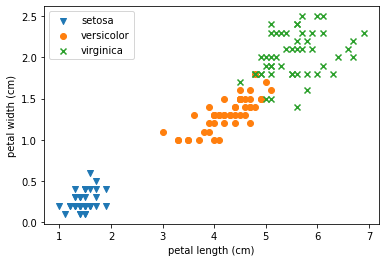

In [12]:
# 実際の分布

# labelsの値が「setosa」のものを取得し、▼で描画
ldata = df[df['target'] == 'setosa'].values
plt.scatter(ldata[:, 2], ldata[:, 3],marker='v',label='setosa')
# labelsの値が「versicolor」のものを取得し、●で描画
ldata = df[df['target'] == 'versicolor'].values
plt.scatter(ldata[:, 2], ldata[:, 3],marker='o',label='versicolor')
# labelsの値が「virginica」のものを取得し、xで描画
ldata = df[df['target'] == 'virginica'].values
plt.scatter(ldata[:, 2], ldata[:, 3],marker='x',label='virginica')
# 凡例を表示
plt.legend(loc='best') 
# 軸の名前を表示
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.show()

## 3.k-means法による分類

### sample13
- dfから説明変数だけを取得
- numpyの配列としてdataに代入

In [13]:
# dfから説明変数だけを取得
df2 = df.iloc[:,0:4]
# numpyの配列としてdataに代入
data = df2.values
# データの中身を確認
df2

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

### sample14
- k-meansでクラスタリング処理を行う
- **KMeans**でk-meansのインスタンス作成
- **max_iter** … 最大の計算回数
- **n_clusters** … 分類するクラスターの数
- **init** … 初期の重心の設定方法（random:乱数による設定）
- fitで計算
- 4種類の説明変数を渡す

In [14]:
# K-meansのインポート
from sklearn.cluster import KMeans
# K-meansによるクラスタリングの結果
model = KMeans(n_clusters=3, max_iter=30, init="random")
# 引数として説明変数を与える
model.fit(data)

KMeans(init='random', max_iter=30, n_clusters=3)

### sample15
- 分類結果のラベルを表示
- 0 〜 2の値で得られる

In [15]:
# 分類結果出るラベルのデータをモデルから取得　
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

### sample16
- df2にtargetの列を追加

In [16]:
df2['target'] = labels
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       2  
1       2  
2       2  
3       2  
4       2

### sample17
- df2の結果を散布図に描画

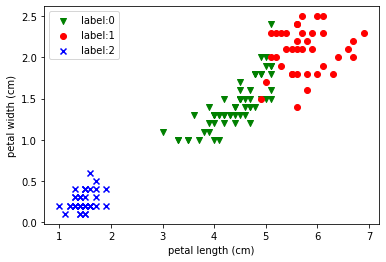

In [17]:
# labelsの値が0のものを取得し、▼で描画
ldata = df2[labels == 0].values
plt.scatter(ldata[:, 2], ldata[:, 3], color='g',marker='v',label='label:0')
# labelsの値が1のものを取得し、●で描画
ldata = df2[labels == 1].values
plt.scatter(ldata[:, 2], ldata[:, 3], color='r',marker='o',label='label:1')
# labelsの値が1のものを取得し、xで描画
ldata = df2[labels == 2].values
plt.scatter(ldata[:, 2], ldata[:, 3], color='b',marker='x',label='label:2')
# 凡例を表示
plt.legend(loc='best') 
# 軸の名前を表示
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.show()